In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pgscen.iso.ercot import create_day_ahead_load_scenario

In [2]:
load_zone_actual_df = pd.read_csv('../data/Load/ERCOT/Actual/load_actual_1h_zone_2017_2018_utc.csv',
                                 parse_dates=['Time'],index_col='Time')
load_zone_forecast_df = pd.read_csv('../data/Load/ERCOT/Day-ahead/load_day_ahead_forecast_zone_2017_2018_utc.csv',
                                   parse_dates=['Issue_time','Forecast_time'])
load_zone_list = load_zone_actual_df.columns.tolist()

In [119]:
scenario_start_time = pd.to_datetime('2018-02-21 06:00:00',utc=True)
nscen = 1000
output_dir = '/Users/xy3134/Research/PERFORM/Data/GEMINI_scenario/test/'

In [120]:
load_zone_hist_actual_df = load_zone_actual_df[load_zone_actual_df.index<scenario_start_time]
load_zone_hist_forecast_df = load_zone_forecast_df[load_zone_forecast_df['Forecast_time']<scenario_start_time]

load_zone_future_actual_df = load_zone_actual_df[load_zone_actual_df.index>=scenario_start_time]
load_zone_future_forecast_df = load_zone_forecast_df[load_zone_forecast_df['Forecast_time']>=scenario_start_time]

In [121]:
md,gen = create_day_ahead_load_scenario(nscen,scenario_start_time,load_zone_list,load_zone_hist_actual_df,
            load_zone_hist_forecast_df,load_zone_future_actual_df,load_zone_future_forecast_df,output_dir,
            return_model=True,return_generator=True)

In [14]:
gen.forecast_dict['North']

,0600,0700,0800,0900,1000,1100,1200,1300,1400,1500,...,2000,2100,2200,2300,0000,0100,0200,0300,0400,0500
0,1393.97,1392.1443,1404.7813,1416.8771,1468.5959,1571.3832,1629.774,1656.4402,1687.6144,1698.4282,...,1529.2804,1496.7333,1541.8455,1580.408,1574.7844,1564.1068,1523.7915,1462.6282,1398.9351,1363.5305


In [15]:
df = md.deviation_dict['North']
cap = df['Forecast'].max()

In [16]:
(df['Forecast']-1698.4282).abs().sort_values().index[0:200]

Int64Index([3877, 4814, 4960, 3878, 6589, 4813, 4815, 4956, 3879, 4790,
            ...
            8748, 5487, 4527, 5413, 4625, 6229, 8755, 5295, 5173, 4744],
           dtype='int64', length=200)

In [18]:
df.loc[[100,101],'Actual']

100    1328.29
101    1417.31
Name: Actual, dtype: float64

In [11]:
index = (df['Forecast']-1698.4282).abs().sort_values().index[0:200]

(array([ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
         1.,  1.,  7.,  5.,  5.,  3.,  3., 12., 13.,  7., 18., 19., 32.,
        31., 12., 22.,  5.]),
 array([-691.06 , -663.289, -635.518, -607.747, -579.976, -552.205,
        -524.434, -496.663, -468.892, -441.121, -413.35 , -385.579,
        -357.808, -330.037, -302.266, -274.495, -246.724, -218.953,
        -191.182, -163.411, -135.64 , -107.869,  -80.098,  -52.327,
         -24.556,    3.215,   30.986,   58.757,   86.528,  114.299,
         142.07 ]),
 <BarContainer object of 30 artists>)

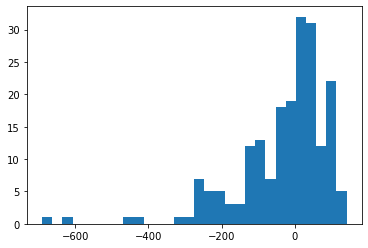

In [12]:
plt.hist(df.loc[index]['Deviation'],bins=30)

(array([ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
         1.,  1.,  7.,  5.,  5.,  3.,  3., 12., 13.,  7., 18., 19., 32.,
        31., 12., 22.,  5.]),
 array([-691.06 , -663.289, -635.518, -607.747, -579.976, -552.205,
        -524.434, -496.663, -468.892, -441.121, -413.35 , -385.579,
        -357.808, -330.037, -302.266, -274.495, -246.724, -218.953,
        -191.182, -163.411, -135.64 , -107.869,  -80.098,  -52.327,
         -24.556,    3.215,   30.986,   58.757,   86.528,  114.299,
         142.07 ]),
 <BarContainer object of 30 artists>)

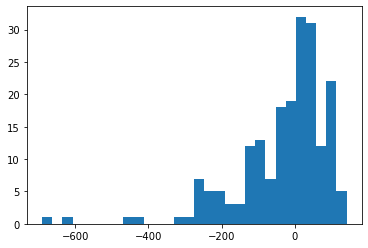

In [6]:
plt.hist(gen.conditional_gpd_dict['North_9'].slots['data'],bins=30)

/var/folders/s_/n1m3rnq56951j2vyslszl3640000gp/T/ipykernel_79304/388789402.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


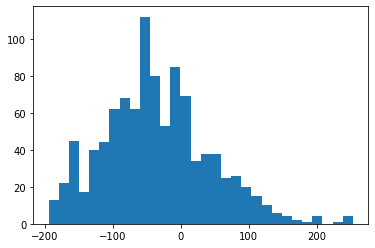

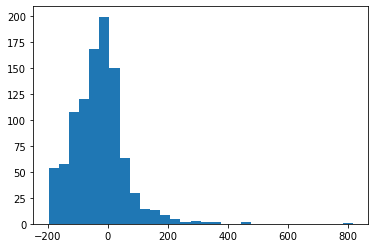

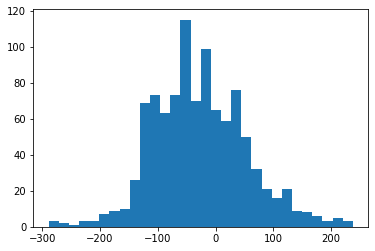

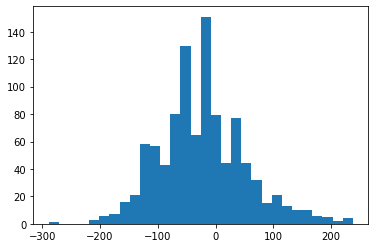

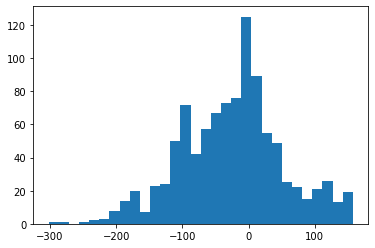

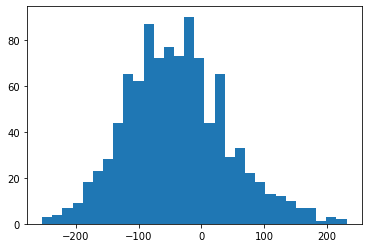

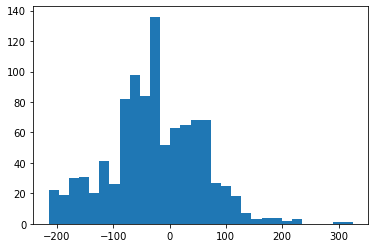

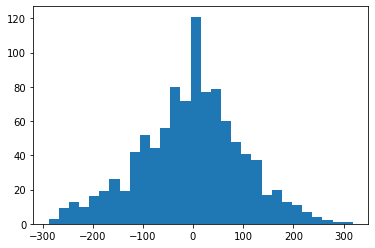

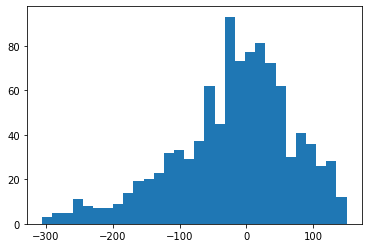

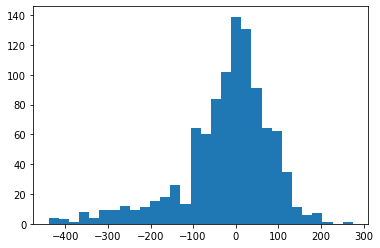

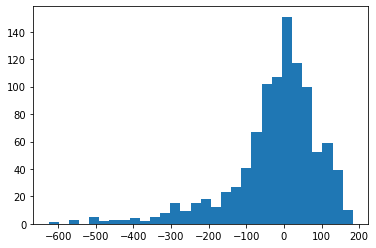

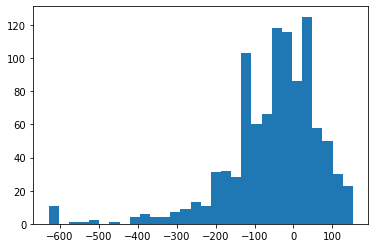

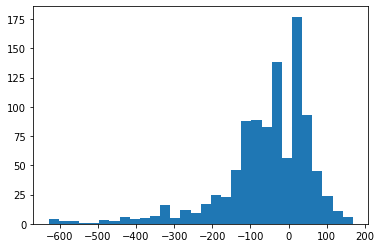

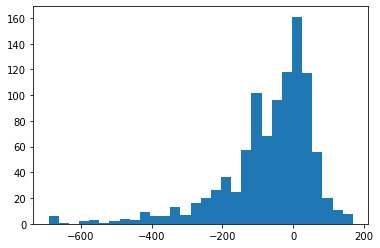

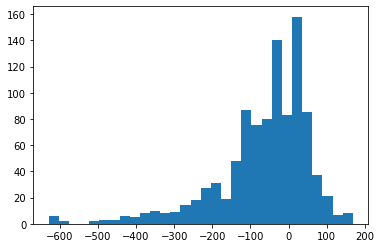

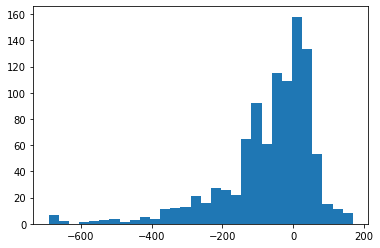

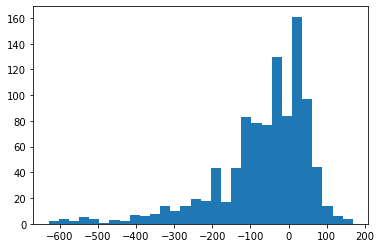

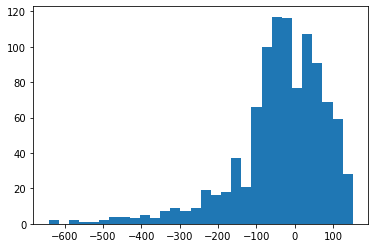

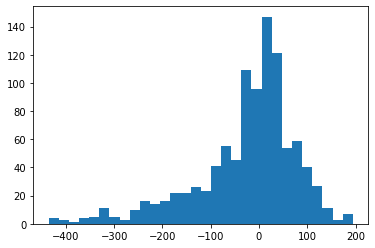

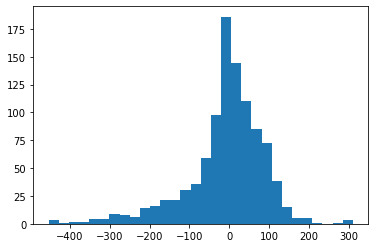

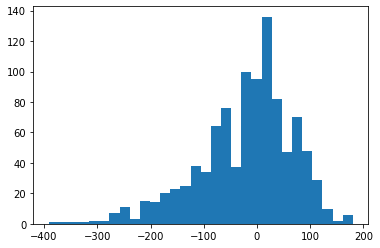

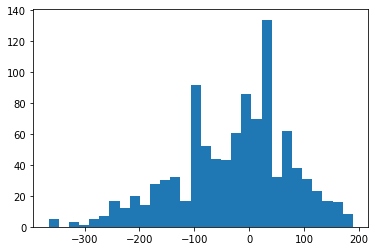

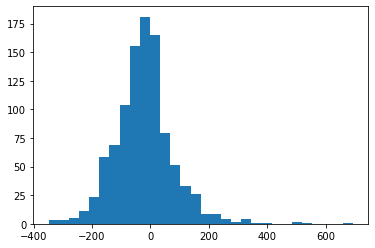

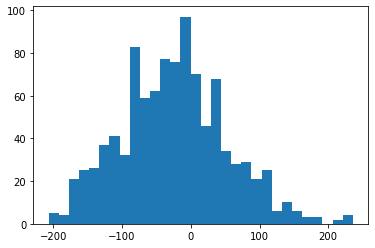

In [65]:
for col in gen.scen_dict['Coast'].columns:
    plt.figure()
    plt.hist(gen.deviation_scen_dict['North'][col],bins=30)

In [118]:
!ls /Users/xy3134/Research/PERFORM/Data/GEMINI_scenario/test/

20180102 20180210 20180701 20180718 20181001
20180103 20180221 20180702 20180901


In [132]:
df = pd.read_csv('/Users/xy3134/Research/PERFORM/Data/GEMINI_scenario/test/20180221/load/South.csv')

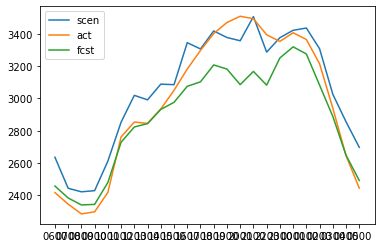

In [150]:
idx = np.random.randint(1000)
plt.plot(df.iloc[2+idx,2:],label='scen')
plt.plot(df.iloc[0,2:],label='act')
plt.plot(df.iloc[1,2:],label='fcst')
plt.legend()

In [18]:
gen.forecast_dict['North']

,0600,0700,0800,0900,1000,1100,1200,1300,1400,1500,...,2000,2100,2200,2300,0000,0100,0200,0300,0400,0500
0,1393.97,1392.1443,1404.7813,1416.8771,1468.5959,1571.3832,1629.774,1656.4402,1687.6144,1698.4282,...,1529.2804,1496.7333,1541.8455,1580.408,1574.7844,1564.1068,1523.7915,1462.6282,1398.9351,1363.5305
